# Near Earth Objects-NEOs
Asteroids, sometimes called minor planets, are rocky, airless remnants left over from the early formation of our solar system about 4.6 billion years ago.

The total mass of all the asteroids in the main asteroid belt combined is less than that of Earth's Moon.

Asteroids are small, rocky objects that orbit the Sun. Although asteroids orbit the Sun like planets, they are much smaller than planets.\
There are lots of asteroids in our solar system. Most of them are located in the main asteroid belt – a region between the orbits of Mars and Jupiter.

Some asteroids go in front of and behind Jupiter. These are called Trojan asteroids. Asteroids that come close to Earth are called Near Earth Objects, NEOs for short. NASA keeps a close watch on NEOs.

Asteroids are left over from the formation of our solar system. 

Here, I will use:\
1 : Pandas for Data Preparation & Cleaning\
2 : Matplotlib and Seaborn for Exploratory Analysis & Visualization

## Downloading the Dataset
We download the dataset and load it into the python to analyse it.

This dataset has been downloaded from www.kaggle.com .

In [1]:
!pip install jovian --upgrade --quiet
!pip install pandas --upgrade --quiet
!pip install jovian opendatasets --upgrade --quiet

In [2]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from urllib.request import urlretrieve

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects'

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./nasa-nearest-earth-objects" (use force=True to force download)


The dataset has been downloaded and extracted.

In [5]:
project_name = "Nearest Earth Objects"

## Data Preparation and Cleaning

We will load the data and clean it to analyse it properly.



We begin with loading our data in this jupiter notebook with the help of pandas library.

In [6]:
aster_df = pd.read_csv(r'nasa-nearest-earth-objects/neo_v2.csv')
aster_df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


Now we use the info() function to check the datatype of all the columns in the given dataset and also check if there's any null value in the dataset.

In [7]:
aster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


As we can see there's no null value in any of the columns of the dataset. Hence there's no missing values in the dataset. 

Now we look for all the data that's not relevant to us. For example we check for the column 'orbiting_body'.

In [8]:
aster_df['orbiting_body'].value_counts()

Earth    90836
Name: orbiting_body, dtype: int64

Since the column orbiting_body has all single type of entries so it can be deleted from the dataset.

In [9]:
del aster_df['orbiting_body']
aster_df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,False,20.09,True
...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,False,27.80,False


Here the 'orbiting_body' column has been deleted from the dataset.

Now we will clean the data further by creating a new column 'average_radius' which will hold the average of 'est_diameter_min' and 'est_diameter_max' so that we have an average value of the diameter instead of having values of two extremes.        

In [10]:
aster_df['average_dia']=(aster_df['est_diameter_min']+aster_df['est_diameter_max'])/2
aster_df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous,average_dia
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,False,16.73,False,1.938843
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,False,20.00,True,0.430073
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,False,17.83,False,1.168268
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,False,22.20,False,0.156150
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,False,20.09,True,0.412613
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,False,25.00,False,0.043007
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,False,26.00,False,0.027136
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,False,24.60,False,0.051706
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,False,27.80,False,0.011845


Average diameter column 'average_dia' has been added to the dataset.

On observing the name of the asteroids closely, we notice that the column 'name' contains not just the name of the asteroid but also some information other than the name, one of which seems to be the year in which the asteroid headed towards Earth. So we try to clean the column 'name' and try to extract the name and the year from the not so clear column.

In [11]:
aster_df['cleanedname']=aster_df.name.str.extract('.*\((.*)\).*')
aster_df[['year','first_name']]=aster_df['cleanedname'].str.split(n=1,expand=True)
aster_df=aster_df[['id','first_name','year','est_diameter_min','est_diameter_max','average_dia','relative_velocity','miss_distance','absolute_magnitude','sentry_object','hazardous']]
aster_df

,id,first_name,year,est_diameter_min,est_diameter_max,average_dia,relative_velocity,miss_distance,absolute_magnitude,sentry_object,hazardous
0,2162635,SS164,2000,1.198271,2.679415,1.938843,13569.249224,5.483974e+07,16.73,False,False
1,2277475,WK4,2005,0.265800,0.594347,0.430073,73588.726663,6.143813e+07,20.00,False,True
2,2512244,YE18,2015,0.722030,1.614507,1.168268,114258.692129,4.979872e+07,17.83,False,False
3,3596030,BV13,2012,0.096506,0.215794,0.156150,24764.303138,2.543497e+07,22.20,False,False
4,3667127,GE35,2014,0.255009,0.570217,0.412613,42737.733765,4.627557e+07,20.09,False,True
...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,VX1,2016,0.026580,0.059435,0.043007,52078.886692,1.230039e+07,25.00,False,False
90832,3837603,AD3,2019,0.016771,0.037501,0.027136,46114.605073,5.432121e+07,26.00,False,False
90833,54017201,JP3,2020,0.031956,0.071456,0.051706,7566.807732,2.840077e+07,24.60,False,False
90834,54115824,CN5,2021,0.007321,0.016370,0.011845,69199.154484,6.869206e+07,27.80,False,False


The first_name column in the above dataset contains the names of the asteroids whereas 'year' column contains the year in which they approached Earth.

The datatype of the values in 'year' column is 'str' and we convert it to 'int' so it is easy to sort, group and perform other operations on it.

In [12]:
asteroid_df=aster_df[aster_df['year'].str.isnumeric()==True]
asteroid_df['year']=asteroid_df['year'].astype(int)
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90830 entries, 0 to 90835
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90830 non-null  int64  
 1   first_name          90830 non-null  object 
 2   year                90830 non-null  int64  
 3   est_diameter_min    90830 non-null  float64
 4   est_diameter_max    90830 non-null  float64
 5   average_dia         90830 non-null  float64
 6   relative_velocity   90830 non-null  float64
 7   miss_distance       90830 non-null  float64
 8   absolute_magnitude  90830 non-null  float64
 9   sentry_object       90830 non-null  bool   
 10  hazardous           90830 non-null  bool   
dtypes: bool(2), float64(6), int64(2), object(1)
memory usage: 7.1+ MB


/tmp/ipykernel_371/790726286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asteroid_df['year']=asteroid_df['year'].astype(int)


We cleaned the 'name' column and from it extracted two separate columns 'name' and 'year' that show the name of the asteroid and the year of asteroid approach. We will now clean the 'year' column further by deleting the rows from the dataset that contain irrelevant entries(i.e. value of year > current year) in the 'year' column.

In [13]:
asteroid_df=asteroid_df[asteroid_df.year<2022]
asteroid_df=asteroid_df[asteroid_df.year>1900]
asteroid_df

,id,first_name,year,est_diameter_min,est_diameter_max,average_dia,relative_velocity,miss_distance,absolute_magnitude,sentry_object,hazardous
0,2162635,SS164,2000,1.198271,2.679415,1.938843,13569.249224,5.483974e+07,16.73,False,False
1,2277475,WK4,2005,0.265800,0.594347,0.430073,73588.726663,6.143813e+07,20.00,False,True
2,2512244,YE18,2015,0.722030,1.614507,1.168268,114258.692129,4.979872e+07,17.83,False,False
3,3596030,BV13,2012,0.096506,0.215794,0.156150,24764.303138,2.543497e+07,22.20,False,False
4,3667127,GE35,2014,0.255009,0.570217,0.412613,42737.733765,4.627557e+07,20.09,False,True
...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,VX1,2016,0.026580,0.059435,0.043007,52078.886692,1.230039e+07,25.00,False,False
90832,3837603,AD3,2019,0.016771,0.037501,0.027136,46114.605073,5.432121e+07,26.00,False,False
90833,54017201,JP3,2020,0.031956,0.071456,0.051706,7566.807732,2.840077e+07,24.60,False,False
90834,54115824,CN5,2021,0.007321,0.016370,0.011845,69199.154484,6.869206e+07,27.80,False,False


Above dataset is the cleaned dataset and ready to be explored. We can now begin using it for exploratory analysis and visualisation. 

## Exploratory Analysis and Visualization

Now we will analyse the data and try to plot graphs for various attributes of the dataset to understand and draw more information from the given dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000001'

Lets begin by printing the dataset first.

In [15]:
asteroid_df

,id,first_name,year,est_diameter_min,est_diameter_max,average_dia,relative_velocity,miss_distance,absolute_magnitude,sentry_object,hazardous
0,2162635,SS164,2000,1.198271,2.679415,1.938843,13569.249224,5.483974e+07,16.73,False,False
1,2277475,WK4,2005,0.265800,0.594347,0.430073,73588.726663,6.143813e+07,20.00,False,True
2,2512244,YE18,2015,0.722030,1.614507,1.168268,114258.692129,4.979872e+07,17.83,False,False
3,3596030,BV13,2012,0.096506,0.215794,0.156150,24764.303138,2.543497e+07,22.20,False,False
4,3667127,GE35,2014,0.255009,0.570217,0.412613,42737.733765,4.627557e+07,20.09,False,True
...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,VX1,2016,0.026580,0.059435,0.043007,52078.886692,1.230039e+07,25.00,False,False
90832,3837603,AD3,2019,0.016771,0.037501,0.027136,46114.605073,5.432121e+07,26.00,False,False
90833,54017201,JP3,2020,0.031956,0.071456,0.051706,7566.807732,2.840077e+07,24.60,False,False
90834,54115824,CN5,2021,0.007321,0.016370,0.011845,69199.154484,6.869206e+07,27.80,False,False


Counting the number of hazardous and non-hazardous planets in the dataset.

In [16]:
asteroid_df.hazardous.value_counts()

False    79164
True      8756
Name: hazardous, dtype: int64

Plotting the number of hazardous and non-hazardous asteroids in a pie chart to get the better visualisation of them

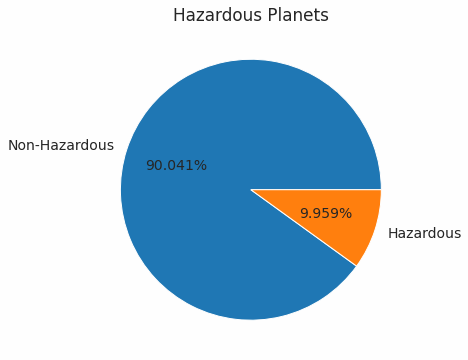

In [17]:
plt.figure(figsize=(10,6));
mylabels=["Non-Hazardous","Hazardous"]
asteroid_df.hazardous.value_counts().plot(kind='pie',labels=mylabels,autopct='%1.3f%%').yaxis.set_visible(False)
plt.title('Hazardous Planets');


Out of all the given asteroids that approached the Earth 90.041% were Non-Hazardous while the rest i.e. 9.959% can be considered Hazardous. Hence around one in ten asteroids is hazardous. 

Sorting the dataset in ascending order to find what were the top 10 closest distances between the Earth and trajectory of the asteroid.

In [18]:
closest_df=asteroid_df.sort_values('miss_distance',ascending=True).head(10)
closest_df

,id,first_name,year,est_diameter_min,est_diameter_max,average_dia,relative_velocity,miss_distance,absolute_magnitude,sentry_object,hazardous
81361,54087809,VT4,2020,0.004837,0.010815,0.007826,48337.630377,6745.532516,28.70,False,False
79344,54051131,QG,2020,0.002783,0.006224,0.004503,44391.122303,9316.925424,29.90,False,False
87352,54212443,UA1,2021,0.001139,0.002547,0.001843,57006.024697,9426.685381,31.84,False,False
33866,3556206,CQ1,2011,0.001011,0.002260,0.001635,34896.385840,11851.666854,32.10,False,False
74788,3892165,UN13,2019,0.001058,0.002366,0.001712,46242.336196,12613.434168,32.00,False,False
24949,3430497,TS26,2008,0.000609,0.001362,0.000985,56751.017090,12638.162696,33.20,False,False
9766,3249978,FU162,2004,0.004837,0.010815,0.007826,48206.321865,12913.138541,28.70,False,False
57600,54000953,CD3,2020,0.001193,0.002667,0.001930,27985.412177,13104.324618,31.74,False,False
77783,54016959,JJ,2020,0.002658,0.005943,0.004301,51686.092807,13403.654996,30.00,False,False
55144,3831871,UA,2018,0.002424,0.005421,0.003922,50925.507594,13672.003656,30.20,False,False


Plotting the scatter graph to show in which year did these closest approaches take place.

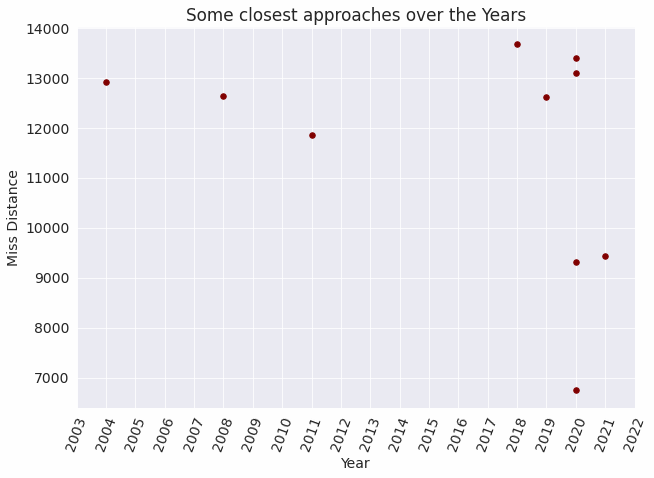

In [19]:
closest_df['year'] = closest_df['year'].astype(int, errors = 'raise')
closest_df.plot('year','miss_distance',kind='scatter',figsize=(10, 7),s=30,color='maroon');
plt.xlabel('Year')
plt.ylabel('Miss Distance')
plt.xticks(np.arange(2003, 2023, 1),rotation=70);
plt.yticks(np.arange(7000, 14500, 1000));
plt.title("Some closest approaches over the Years");

Scatter plot makes it clear that closest approaches were maximum with a count of 4 in year 2020. And the closest one with a distance less than 7000 kms also took place in 2020. 

Also its important to note that we cannot declare an asteroid hazardous or non-hazardous just by undertaking into account the closest distance of its trajectory from the Earth. There are other factors like the size of the asteroid that are important to consider inorder to list an asteroid as hazardous or non-hazardous.


Absolute magnitude (M) is a measure of the intrinsic luminosity of a celestial object.
Now we try to analyse if we can extract any information about the Intrinsic Luminosity of the asteroids from the given dataset. 

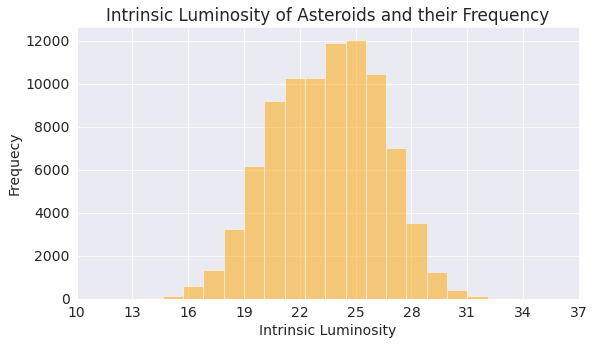

In [20]:
asteroid_df.absolute_magnitude.plot(kind='hist',bins=19,alpha=0.5,color='Orange')
plt.xlabel('Intrinsic Luminosity')
plt.ylabel('Frequecy');
plt.xticks(np.arange(10, 40, 3));
plt.title("Intrinsic Luminosity of Asteroids and their Frequency");

This shows that most of the asteroids (around 54000 out of 87920) had an intrinsic luminosity between 21 and 26.

In [21]:
asteroid_df.year.value_counts(ascending=True)

1963       1
1953       1
1947       1
1979       1
1968       1
        ... 
2016    6275
2017    6546
2019    7429
2020    8635
2021    9440
Name: year, Length: 65, dtype: int64

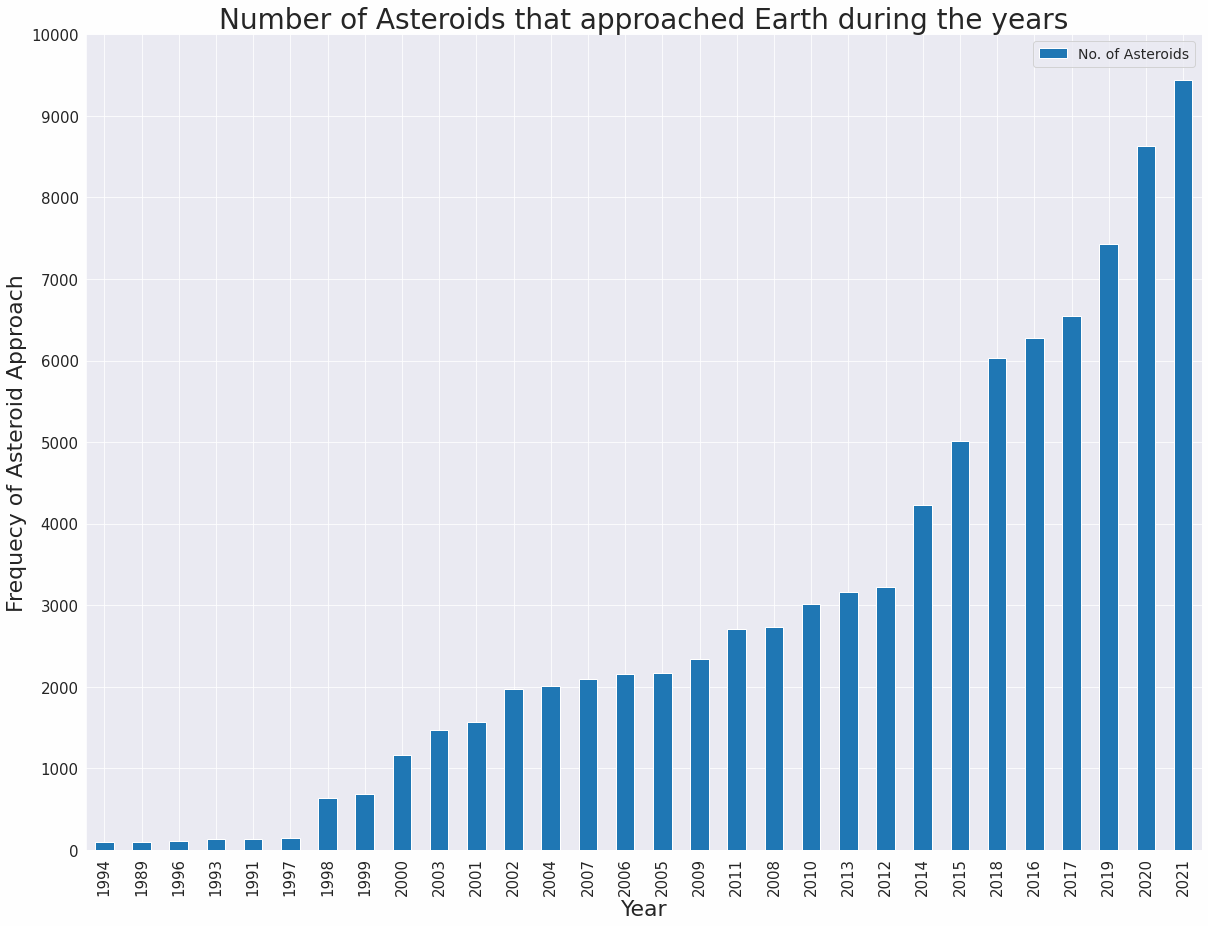

In [22]:
asteroid_df.year.value_counts(ascending=True).tail(30).plot(kind='bar',figsize=(20, 15),label='No. of Asteroids');
plt.xticks(fontsize=15)
plt.yticks(np.arange(0,10500,1000),fontsize=15);
plt.xlabel('Year',fontsize=22);
plt.ylabel('Frequecy of Asteroid Approach',fontsize=22);
plt.title("Number of Asteroids that approached Earth during the years",fontsize=28);
plt.legend();

The above bar plot shows the number of asteroids that approached Earth every year in the last three decades. The plot shows that the number has been significantly increasing every year after 2016. 2021 marks the year with highest number of approaches. 

Now we look further to the number of hazardous asteroids that approached Earth in last three decades.

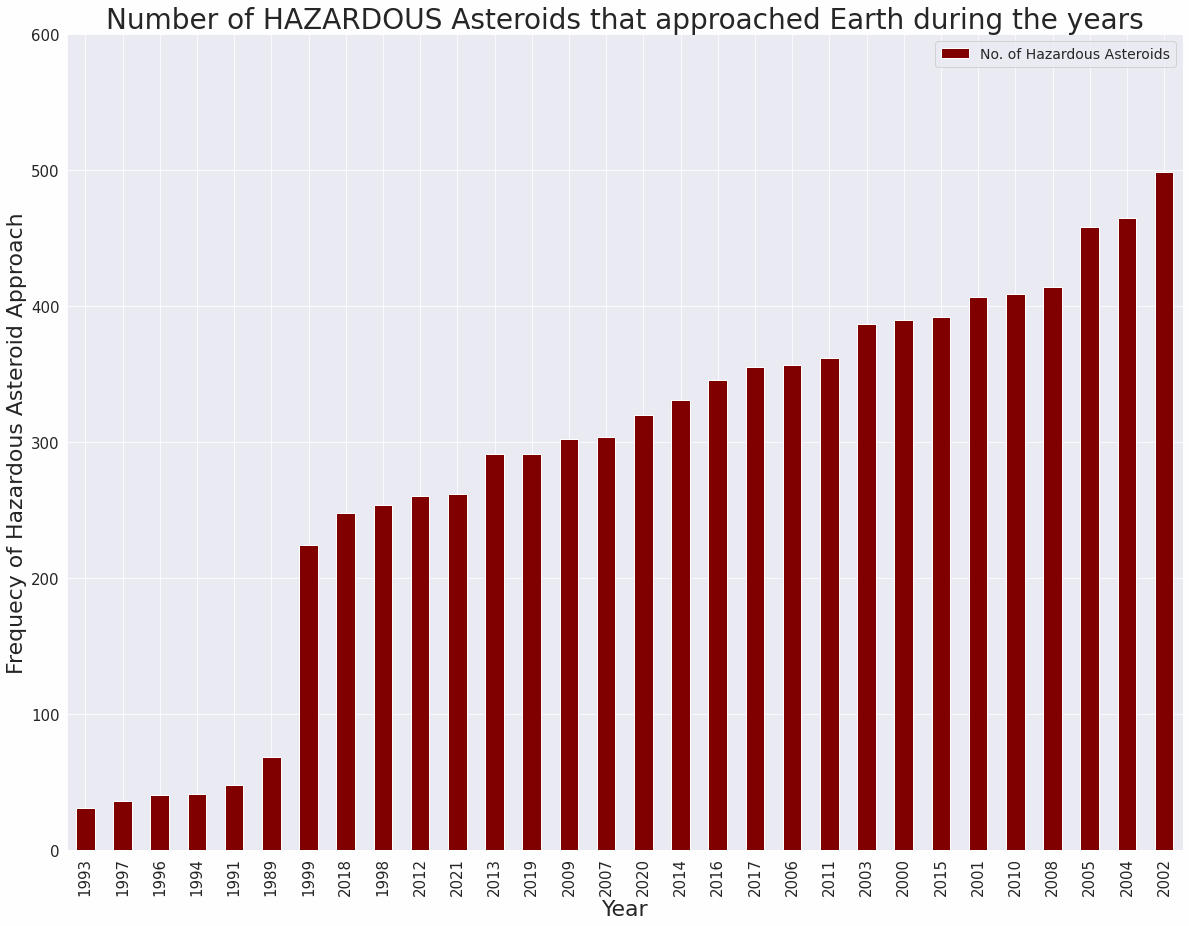

In [23]:
asteroid_df['year'][asteroid_df['hazardous']==True].value_counts(ascending=True).tail(30).plot(kind='bar',color='maroon',label='No. of Hazardous Asteroids',figsize=(20, 15));
plt.xticks(fontsize=15)
plt.yticks(np.arange(0,700,100),fontsize=15);
plt.xlabel('Year',fontsize=22)
plt.ylabel('Frequecy of Hazardous Asteroid Approach',fontsize=22);
plt.title("Number of HAZARDOUS Asteroids that approached Earth during the years",fontsize=28);
plt.legend();

This bar plot shows the number of hazardous asteroid that have approached Earth in last three decades and the number is highest for year 2002 followed by year 2004 and 2005.

## Asking and Answering Questions

TODO - Here are the few question along with their answers that have been raised with reference to the above dataset.



#### Q1: When were the largest and smallest hazardous asteroid that approached Earth? Also mention their diameters.

In [24]:
lrgst_dia=asteroid_df[asteroid_df['hazardous']==True]
print("Largest Diameter","\n",lrgst_dia.iloc[lrgst_dia['average_dia'].argmax()])
print("\n","Smallest Diameter","\n",lrgst_dia.iloc[lrgst_dia['average_dia'].argmin()])

Largest Diameter 
 id                            2003122
first_name                        ET3
year                             1981
est_diameter_min             4.135757
est_diameter_max             9.247833
average_dia                  6.691795
relative_velocity        69369.863037
miss_distance         50689199.634446
absolute_magnitude              14.04
sentry_object                   False
hazardous                        True
Name: 31809, dtype: object

 Smallest Diameter 
 id                            3180153
first_name                       HG12
year                             2004
est_diameter_min             0.088015
est_diameter_max             0.196807
average_dia                  0.142411
relative_velocity         55415.59645
miss_distance         11743810.978415
absolute_magnitude               22.4
sentry_object                   False
hazardous                        True
Name: 10044, dtype: object


Largest hazardous asteroid was 'ET3', in year 1981 having an average diameter of 6.69 kms.

Smallest hazardous asteroid was 'HG12', in year 2004 having an average diameter of 0.14 kms.

#### Q2: Give the details of the asteroid that has the highest relative velocity.

In [31]:
asteroid_df.iloc[asteroid_df['relative_velocity'].argmax()]

id                            3840692
first_name                        EJ3
year                             2019
est_diameter_min             0.079902
est_diameter_max             0.178665
average_dia                  0.129283
relative_velocity       236990.128088
miss_distance         16722264.955538
absolute_magnitude              22.61
sentry_object                   False
hazardous                       False
Name: 57149, dtype: object

'EJ3' is the asteroid with the highest relative velocity in year 2019 which has the details given above. It is a non-hazardous asteroid due to its small diameter (i.e. 0.12 km) and large miss distance (i.e. 16722264.95 km) 

#### Q3:How has the asteroid frequency varied over the years?

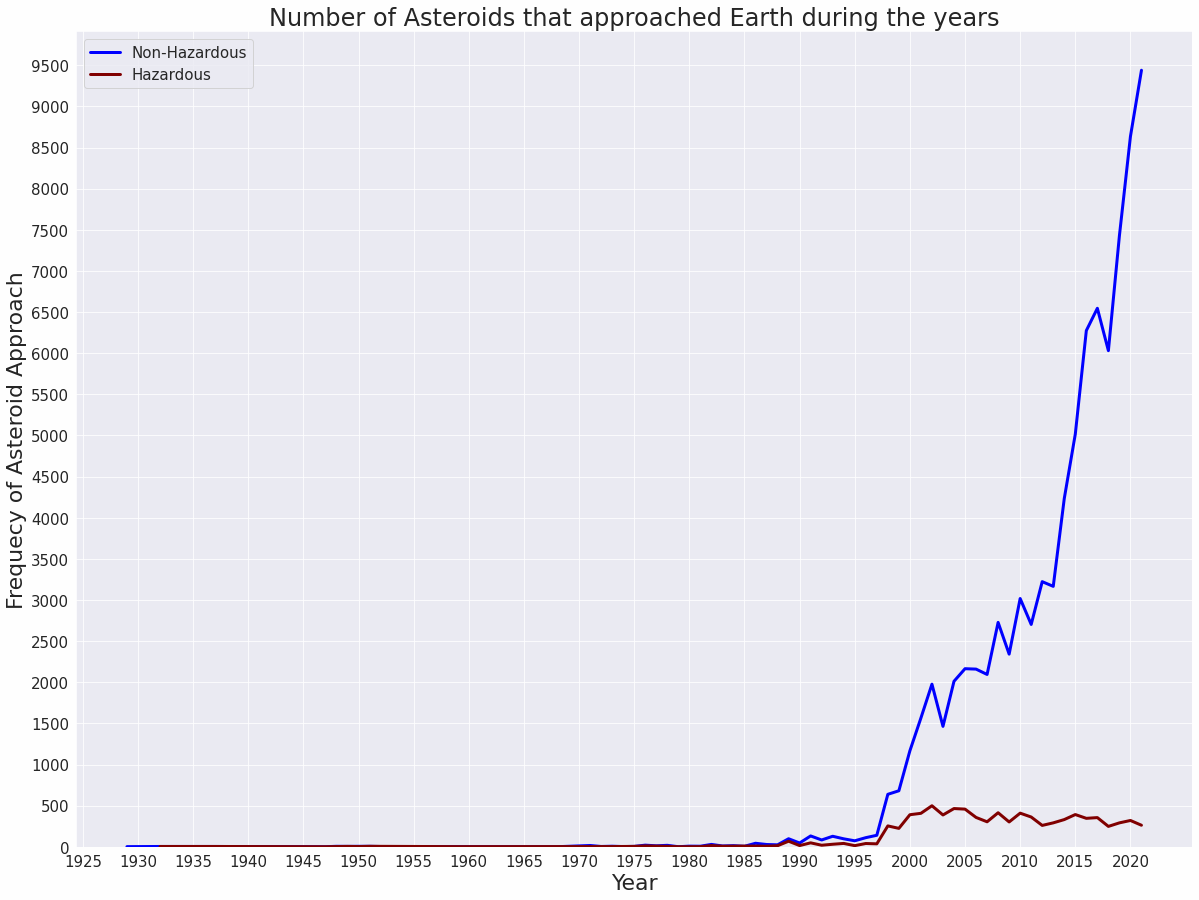

In [26]:
asteroid_df['year'].sort_values().value_counts(sort=False).plot(kind='line',color='blue',label='Non-Hazardous',figsize=(20,15),lw=3);
asteroid_df['year'][asteroid_df['hazardous']==True].sort_values().value_counts(sort=False).plot(kind='line',color='maroon',label='Hazardous',lw=3,figsize=(20,15));
plt.xticks(np.arange(1925,2025,5),fontsize=15)
plt.yticks(np.arange(0,10000,500),fontsize=15);
plt.ylim(ymin=0)
plt.xlabel('Year',fontsize=22)
plt.ylabel('Frequecy of Asteroid Approach',fontsize=22);
plt.title("Number of Asteroids that approached Earth during the years",fontsize=24);
plt.legend(fontsize=15);

Above graph shows the variation of frequency of asteroid approaches over the years. We can clearly see that the number is on the sharp rise from year 1997.

#### Q4: What is the asteroid with highest and lowest value of intrinsic luminosity?

In [27]:
print("Maximum Luminosity","\n",asteroid_df.iloc[asteroid_df['absolute_magnitude'].argmax()])
print("\n","Minimum Luminosity","\n",asteroid_df.iloc[asteroid_df['absolute_magnitude'].argmin()])

Maximum Luminosity 
 id                         3430497
first_name                    TS26
year                          2008
est_diameter_min          0.000609
est_diameter_max          0.001362
average_dia               0.000985
relative_velocity      56751.01709
miss_distance         12638.162696
absolute_magnitude            33.2
sentry_object                False
hazardous                    False
Name: 24949, dtype: object

 Minimum Luminosity 
 id                            2001866
first_name                         XA
year                             1972
est_diameter_min              8.64082
est_diameter_max            19.321462
average_dia                 13.981141
relative_velocity         96530.77489
miss_distance         74026905.646286
absolute_magnitude              12.44
sentry_object                   False
hazardous                       False
Name: 16895, dtype: object


'TS26', the asteroid observed in 2008 has the highest value of intrinsic luminosity having an average diameter of 0.000985km.

'XA', the asteroid observed in 1972 has the lowest value of intrinsic luminosity having an average diameter of 13.98km.


## Inferences and Conclusion
Here we analyzed and made a project on Near Earth Objects. Data analysis and statistical interference is performed on a kaggle dataset which has a data on Near Earth Objects. There are 90836 rows and 10 columns in this dataset. Dataset of this particular project is available here : https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects.

From the above analysis and Visualizations we can conclude the following points:
1. Out of all the asteroids mentioned in the dataset less than 10% fall in the hazardous category.  
2. There has been sharp rise in the number of discoveries of asteroids especially after 1995.   
3.  Also the number of hazardous asteroids has increased significantly after 1995.  
4.  Majority of asteroids discovered so far has absolute magnitude lying between 23 to 26.  
5.  Highest number of asteroids has been discovered in year 2021.  
6.  Highest number of hazardous asteroids has been discovered in year 2002.  


## References and Future Work
Analysing and visualising this dataset with time will help us in knowing a lot more about Near Earth Objects.  
References used for this project:  
https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas  
https://www.w3schools.com/python/pandas/  
https://www.tutorialspoint.com/python_pandas/  
https://www.geeksforgeeks.org/python-introduction-matplotlib/  
https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects  



